# Lab 3 - Sequence Logo

 In this lab we will do analysis of sequence data.  Sequence data is a collection of nucleotides that represent information about a biological function.  We will use a data set for from the RegulonDB for this lab that represents binding sites for C-Reactive Protein (CRP) that have a length of 26 base pairs.  We will draw a visual representation of our sequence data.
   
We  will parse a FASTA file of sequence data and use it to generate a sequence logo.  A sequence logo is a visual display of the distribution of a DNA base in each position in the sequence.  

So if there are 4 As and 4 Ts in position one of the sequence, the logo will display half A and half T in the height of the logo.  To generate a sequence logo, we will need to do the following:
1. Count the number of sequences in the file to get the maximum height of the logo
2. For each position in the sequence, count the number of each base pair
3. Divide each count by the maximum number of sequences to get the proportion of the height of each position that should be that base pair
4. Draw the sequence logo

Below is the logo plot of CRP binding sites that we will draw in this lab.

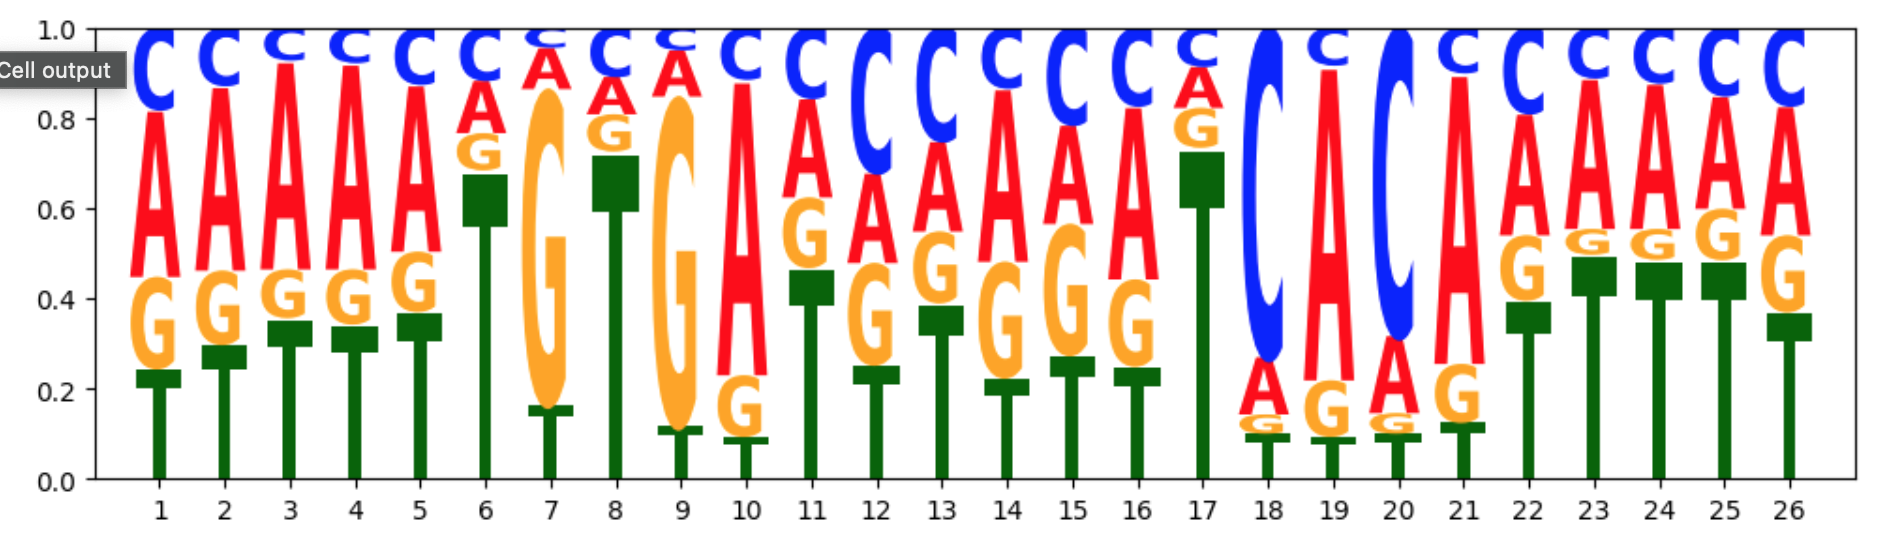

FASTA format is a header line that starts with a > and has metadata about the sequence followed by a newline and then the sequence data.  There can also be comment lines that start with a # in the file.

```code
# this is a comment
>0	caiFp	-41.5
ATAAGCAGGATTTAGCTCACACTTAT
```

We will use multiple Python libraries during this lab.

**numpy** 

https://numpy.org/doc/stable/index.html

NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array objects and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, basic linear algebra, basic statistical operations, random simulation and much more.

**matplotlib**

https://matplotlib.org/

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

## Set up script

To begin our script we will import modules and set up constants.

We'll  use the following constants for this lab.  These are chosen to make the logo look good.
For more information, here is the matplotlib documentation

[TextPath](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.TextPath) - for drawing text on an axis
[PathPatch](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.PathPatch.html#matplotlib.patches.PathPatch) - for drawing a path on an axis
[FontProperties](https://matplotlib.org/stable/api/font_manager_api.html#matplotlib.font_manager.FontProperties) - for setting font properties

[Tutorial for Paths](https://matplotlib.org/stable/users/explain/artists/paths.html) - for information on drawing shapes in matplotlib


In [ ]:
import matplotlib as mpl
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch
from matplotlib.font_manager import FontProperties
import numpy as np

fp = FontProperties(family="monospace", weight="bold") 
globscale = 1.35
LETTERS = { "T" : TextPath((-0.305, 0), "T", size=1, prop=fp),
            "G" : TextPath((-0.384, 0), "G", size=1, prop=fp),
            "A" : TextPath((-0.35, 0), "A", size=1, prop=fp),
            "C" : TextPath((-0.366, 0), "C", size=1, prop=fp) }
COLORS = {'G': 'orange', 
          'A': 'red', 
          'C': 'blue', 
          'T': 'darkgreen'}

## Read data

We will read in our FASTA File using standard Python functions into a list ([Python docs](https://docs.python.org/3/library/stdtypes.html#lists)).

1. Open the file

https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files

The file is located in the "Lab 1" directory and is named "crp_sites.fasta".  To read the path and the filename you join them together using a backslash ("/") character as a separator.

2. Read each line into a list without newlines

There are multiple ways to do this in Python.

https://docs.python.org/3/library/stdtypes.html#str.splitlines
https://docs.python.org/3/library/stdtypes.html#str.split


When you print the first four lines of the array, you should see the following:

['>0\tcaiFp\t-41.5', 'ATAAGCAGGATTTAGCTCACACTTAT', '>1\tcaiTp\t-41.5', 'AAAAATGTGATACCAATCACAGAATA']

In [ ]:
with open('Lab 1/crp_sites.fasta') as f:
    # read each line into a list without newlines
    lines = f.read().splitlines()
    print(lines[0:4])


['>0\tcaiFp\t-41.5', 'ATAAGCAGGATTTAGCTCACACTTAT', '>1\tcaiTp\t-41.5', 'AAAAATGTGATACCAATCACAGAATA']


## Filter data

We want to use only the sequence data to build our logo plot, so we skip any lines that are header lines or comments.

1. Iterate through the list of lines
2. Skip header lines
3. Skip comment lines
4. Add any remaining lines to a new list that contains only sequences

When you print the first 3 lines of the new sequence list, it should look like this:

In [ ]:
['ATAAGCAGGATTTAGCTCACACTTAT', 'AAAAATGTGATACCAATCACAGAATA', 'ATATTGGTGATCCATAAAACAATATT']

['ATAAGCAGGATTTAGCTCACACTTAT',
 'AAAAATGTGATACCAATCACAGAATA',
 'ATATTGGTGATCCATAAAACAATATT']

In [ ]:
# get the sequences by skipping comment lines and fasta header lines
seqs = [seq.strip() for seq in lines if ('#' not in seq) and ('>') not in seq]
print(seqs[0:3])

['ATAAGCAGGATTTAGCTCACACTTAT', 'AAAAATGTGATACCAATCACAGAATA', 'ATATTGGTGATCCATAAAACAATATT']


## Split sequences into character lists

We want to split each character into a list so that we can go through each position one at a time and add the number of each characters in the same position.  

We will use numpy to help us do this.
https://numpy.org/doc/stable/reference/generated/numpy.array.html

The output should be a list of lists with each sequence split into individual characters.  
Make the first three entries in the list look like the following:

In [ ]:
#[['A' 'T' 'A' 'A' 'G' 'C' 'A' 'G' 'G' 'A' 'T' 'T' 'T' 'A' 'G' 'C' 'T' 'C' 'A' 'C' 'A' 'C' 'T' 'T' 'A' 'T']
# ['A' 'A' 'A' 'A' 'A' 'T' 'G' 'T' 'G' 'A' 'T' 'A' 'C' 'C' 'A' 'A' 'T' 'C' 'A' 'C' 'A' 'G' 'A' 'A' 'T' 'A']
# ['A' 'T' 'A' 'T' 'T' 'G' 'G' 'T' 'G' 'A' 'T' 'C' 'C' 'A' 'T' 'A' 'A' 'A' 'A' 'C' 'A' 'A' 'T' 'A' 'T' 'T']]

In [ ]:
# create an array of arrays with each character in the sequences
char_array = np.array([np.array(list(seq)) for seq in seqs])
print(char_array[0:3])

[['A' 'T' 'A' 'A' 'G' 'C' 'A' 'G' 'G' 'A' 'T' 'T' 'T' 'A' 'G' 'C' 'T' 'C'
  'A' 'C' 'A' 'C' 'T' 'T' 'A' 'T']
 ['A' 'A' 'A' 'A' 'A' 'T' 'G' 'T' 'G' 'A' 'T' 'A' 'C' 'C' 'A' 'A' 'T' 'C'
  'A' 'C' 'A' 'G' 'A' 'A' 'T' 'A']
 ['A' 'T' 'A' 'T' 'T' 'G' 'G' 'T' 'G' 'A' 'T' 'C' 'C' 'A' 'T' 'A' 'A' 'A'
  'A' 'C' 'A' 'A' 'T' 'A' 'T' 'T']]


## Calculate the proportion of each base at a position

To draw a sequence logo, we need to go position by position and count the number of characters of each type.  Then we divide that by the total number of characters to figure out the proportion of the height of each position should be that character.

1. Calculate the total number of sequences
2. Create a list of lists where each entry is 0
3. Create an ordered list of the LETTERS keys
3. Iterate over the nucleotides in the ordered list
4. Count the number for that character in each position (columns using axis = 0)
5. Divide that count by the total number of sequences
6. Store it in the correct position in the list of lists

We will use numpy to help us with these calculations

List of lists filled with zeros using [np.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html)

Sum across the character lists using [np.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html)

The list should have 26 entries, one for each nucleotide in the sequence
Each of those entries should be a list that has 4 entries, one for each nucleotide

Example ordered nucleotide list:
['T', 'G', 'A', 'C']

The total count of sequences for this example data should be 358

An example of calculating one proportion:
T = 88  / 358 = 0.24581006 
G = 72  / 358 = 0.20111732 
A = 133 / 358 = 0.37150838
C = 65  / 358 = 0.18156425


Example proportion list:
[0.24581006, 0.20111732, 0.37150838, 0.18156425]


The first three entries in the list should look like the following when you've completed steps 1 - 7:


In [ ]:
#[[0.24581006 0.20111732 0.37150838 0.18156425]
# [0.29888268 0.16201117 0.41061453 0.12849162]
# [0.3575419  0.10614525 0.46368715 0.0726257 ]]

In [ ]:
total_count = len(seqs)
print("Total count", total_count)

ordered_letters = list(LETTERS.keys())

position_base_proportions = np.zeros((len(seqs[0]), 4))

for idx, letter in enumerate(ordered_letters):
    # count the number of this character in each position
    count = np.sum(char_array == letter, axis=0)
    for i, c in enumerate(count):
        position_base_proportions[i][idx] = c / total_count
    
print(position_base_proportions[0:3])

Total count 358
[[0.24581006 0.20111732 0.37150838 0.18156425]
 [0.29888268 0.16201117 0.41061453 0.12849162]
 [0.3575419  0.10614525 0.46368715 0.0726257 ]]


## Create a Path for each letter

We're going to need to draw four characters for each of the 26 entries to make the logo. To do that, we need to create a Path object for each character. We want to make this reusable so we can use it for multiple letters.  We will create a function that can be passed in a letter, x position, y position, and an axis.

We will use [matplotlib.path.PathPatch](https://matplotlib.org/stable/api/path_api.html#matplotlib.path.PathPatch).  
We have specified globscale and COLOR_SCHEME in our constants.

We're using [Affine2D](https://matplotlib.org/stable/gallery/images_contours_and_fields/affine_image.html) to scale the characters to the correct size for the proportion of the height of the graph that each one should take.

We will use the following function **drawLetterAt** to draw each character in a future step.  Read through the documentation for PatchPath and Affine2D to quickly understand how this works.


In [ ]:
def drawLetterAt(letter, x, y, yscale=1, ax=None):
    text = LETTERS[letter]

    t = mpl.transforms.Affine2D().scale(1*globscale, yscale*globscale) + \
        mpl.transforms.Affine2D().translate(x,y) + ax.transData
    p = PathPatch(text, lw=0, fc=COLORS[letter],  transform=t)
    if ax != None:
        ax.add_artist(p)
    return p

## Draw the logo

Now that we have the ability to draw each letter, we need to go through each position and draw each of the four letters for that position.  

1. Go through each of the 26 positions in the main list
2. set y to 0 to start from the bottom of the graph
3. go through each sub-entry for each of the main list's indicies; these contain the proportion of each nucleotide for that position
4. get the letter for that position in the sub-entry
5. add the letter to the logo (using **drawLetterAt**)
6. increment x to go to the next horizontal position
7. keep track of the maximum height of the logo (see hints below)
8. Set the xticks for the plot
9. Set the xlim of the plot
10. Set the ylim of the plot
11. Use tight_layout to make the plot look nice
12. Show the plot

We will set up our plot constants, like so:

```
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,3))
```

**Hints for each variable:**

**x** should start at 1 and be incremented every time an entry is processed
   - example entry is a set of 4 base proportions ([0.24581006 0.20111732 0.37150838 0.18156425])

**y** should start at 0 and increment for each base proportion
  - example base proportion is 0.24581006

**max_y** should start at 0 and use the [max](https://docs.python.org/3/library/functions.html#max) function to check each position's maximum value.  For this lab, the maximum value should be 1 because we've calculated that as the proportion.

**Documentation for matplotlib**

These are all functions that are imported from `plt`

- [xticks](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html) - takes a list of values to draw on the x axis - we are using the position numbers from 1 to 26
- [xlim](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html) - sets the limits of the x axis from 1 to the number of positions
- [ylim](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.ylim.html) - sets the limits of the y axis from 0 to the maximum y value
- [tight_layout](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.tight_layout.html) - automatically adjusts the padding between and around subplots to prevent labels from being cut off
- [show](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) - shows the plot


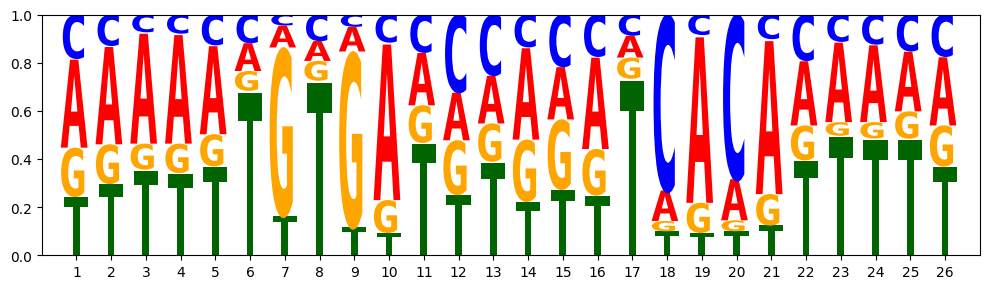

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,3))

x = 1
max_y = 0
for base_proportion in position_base_proportions:
    y = 0
    for idx, base_score in enumerate(base_proportion):
        letter = ordered_letters[idx]
        drawLetterAt(letter, x,y, base_score, ax)
        y += base_score
    x += 1
    max_y = max(max_y, y)

plt.xticks(range(1,x))
plt.xlim((0, x)) 
plt.ylim((0, max_y)) 
plt.tight_layout() 
plt.show()

## Python module

This script works on DNA and only for this specific size of plot.  There is a lot of room for improvement. Rather than write our own script, we can use a library to draw the logo.  One example library is **Logomaker** 

Logomaker will draw sequence logos in a variety of styles, handle other kinds of nucleotides, and annotate the plot in a variety of ways.

Documentation - https://logomaker.readthedocs.io/en/latest/
Python Package - https://pypi.org/project/logomaker/
Python code - https://github.com/jbkinney/logomaker

Experiment with this Python package by installing it to your local machine and runnng the demo code.

## References

Salgado H, et al. (2013) RegulonDB v8.0: omics data sets, evolutionary conservation, regulatory phrases, cross-validated gold standards 
and more. Nucl Acids Res. 41(Database issue):D203–13. 